<a href="https://colab.research.google.com/github/rudri182/predicting-scores-using-linear-regression/blob/main/percentages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Rudri Jani

### Predict the percentage of an student based on the no. of study hours.

This is a simple linear regression task as it involves just 2 variables.

### Importing the Libraries

In [33]:
# importing useful libraries for machine learning using import statements 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

###Importing and Understanding the Data

In [2]:
# get the data from the URL
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)  # read the csv file and make a dataframe
df.head() # looking top 5 rows of the data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# getting information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
# a glance at statistical properties of the data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


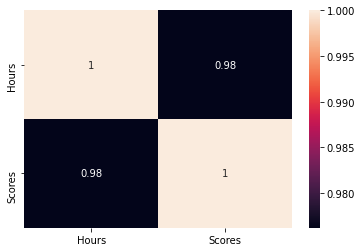

In [5]:
# finding correlation between two columns
corr = df.corr()
sns.heatmap(corr, annot=True)

From the above correlation matrix, it is seen that hours and scores are higlhy correlated.

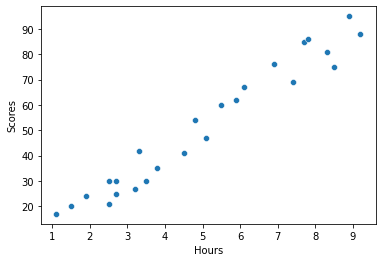

In [6]:
sns.scatterplot(x=df['Hours'], y=df['Scores'])

From the above graph, it is seen that as hours increase, the scores also increase.

###Training the Model

In [17]:
# creating X and Y for linear regression
X = df['Hours'].values
y = df['Scores'].values

X = X.reshape(-1,1)
y = y.reshape(-1,1)

print(X.shape, y.shape)

(25, 1) (25, 1)


In [39]:
# splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [40]:
# checking how many entries are there in each column
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(17, 1) (8, 1)
(17, 1) (8, 1)


In [41]:
# fitting the data into the regreesion model
lr = LinearRegression()
lr.fit(X_train, y_train)
print('Model training completed successfully.')

Model training completed successfully.


In [59]:
# predicting on unseen data
pred = lr.predict(X_test)

In [60]:
print("R2 score:", sm.r2_score(y_test, pred))
print("Mean Square Error:" ,sm.mean_squared_error(y_test, pred))
print("Mean Absolute Error:" ,sm.mean_absolute_error(y_test, pred))
print("Median Absolute Error:", sm.median_absolute_error(y_test, pred))

R2 score: 0.9507739279144464
Mean Square Error: 34.82436937102382
Mean Absolute Error: 5.407487108160234
Median Absolute Error: 5.480114419178324


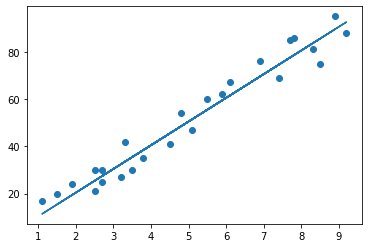

In [65]:
# Plotting the regression line
line = lr.coef_*X + lr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [53]:
# prediction for a student studying 9.25 hours per day
hour = np.array(9.25).reshape(-1,1)
pred_score = lr.predict(hour)

print("No. of hours student studies: {}".format(hour))
print("Scores he/she gets: {}".format(pred_score))

No. of hours student studies: [[9.25]]
Scores he/she gets: [[93.05306649]]
